<a href="https://colab.research.google.com/github/meera998/Netflix_DataAnalysis/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A surface analysis of Netflix's Dataset

Through this project, we will be analyzing the [Netflix Movies and TV Shows ](https://raw.githubusercontent.com/Balenm/NF_DAnalysis/main/data_source/netflix_titles.csv) dataset to identify: 

* **A snapshot:**
> * Distribution of types of movies and series </br>
> * Distribution of genres </br>
> * Distribution of maturity ratings </br>
> * Movies/series added per month per year </br>
> * Top performing directors</br>
* **Countries with highest number of movie/series production**
* **The top 5 actors by the number of times they performed in a movies/series**
* **What are the top genres in each country?**
* **List of the movies that have "happy" in their descriptions**
* **Top three genres by their accumulated durations**
* **Which movies has the longest duration**
* **List 5 longest movies and series**
* **Which series has the highest number of seasons**
* **Count the number of movies and TV series for each year**
* **Which movies has the longest duration**
* **List 3 movies and TV series which have the highest number of cast**
* **Show the total number of ,movies and TV series in each country**
* **Count the movies which relate to magic,animal,history,games and marin**







Importing libraries and the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

url="https://raw.githubusercontent.com/Balenm/NF_DAnalysis/main/data_source/netflix_titles.csv"
netflix_data = pd.read_csv(url)

Finding and deduplicating the list of the movies



In [ ]:
#print (netflix_data.nunique()) #printing the unique values out of 8807 rows

netflix_data = netflix_data.replace("", np.nan) #Changing all the empty data fields to "nan"
netflix_data.sort_values(by=["date_added"], ascending=True,inplace=True)
netflix_data.drop_duplicates(subset=['description'],keep="last", inplace=True)
netflix_clean= netflix_data.sort_values(by=["description"], ascending=True)

# netflix_clean.loc[netflix_clean.duplicated(subset=['description'],keep=False), :]  Showing duplicate movies
#duplicated_NF_ALL.to_csv('file_name.csv', encoding='utf-8') Write to an external CSV file

We are now, exploring the missing values across the dataset and normalize them. To do that, we start by counting the number of missing valuess for each observation as follows: 

show_id          0.0000
type             0.0000
title            0.0000
director        29.9487
cast             9.3675
country          9.3675
date_added       0.1140
release_year     0.0000
rating           0.0456
duration         0.0342
listed_in        0.0000
description      0.0000
dtype: float64


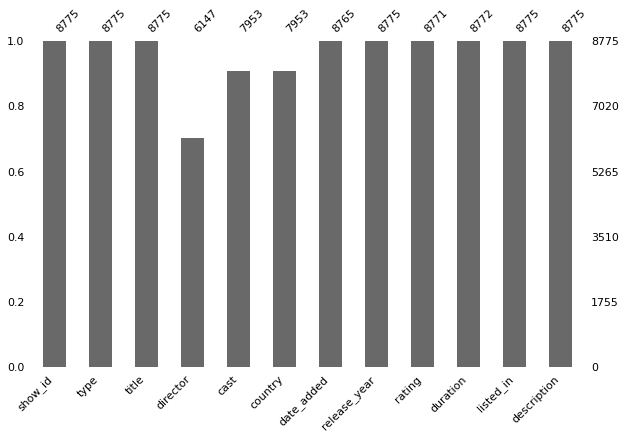

In [ ]:
print(round((netflix_clean.isnull().sum()/8775)*100,4)) #percentage of the null values per each observation
msno.bar(netflix_clean,figsize=(9.9, 6),fontsize=11)

#print(netflix_clean.isnull().sum()) to show the total number of missing values per each observation.
#sns.heatmap(netflix_clean.isna().transpose(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})
#plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

As shown above, we have most of the missing values falling under the "director", "cast" and "country" observations. Now let's understand the distribution of the missing values over data-set

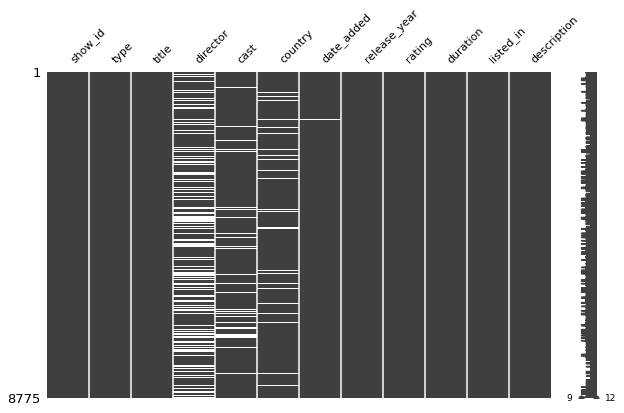

In [ ]:
msno.matrix(netflix_clean,figsize=(10, 6), fontsize=11,)

The values are not evenly distributed over the data-ser, and they are only occured in some observations. The final test we are using to determine the type of the missing values (MCAR, MNAR, MAR) is to understand the correlation of the attributes with missing values.

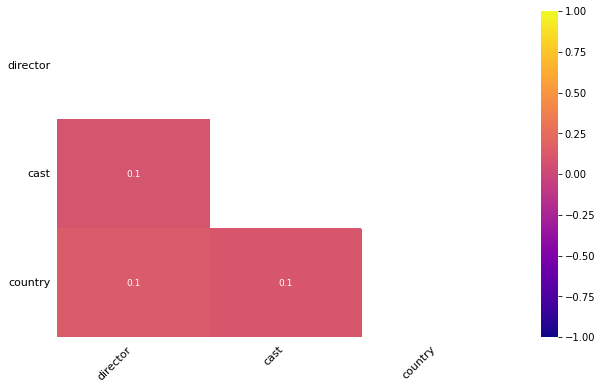

In [ ]:
msno.heatmap(netflix_data[["director","cast","country"]], figsize=(10.2, 6), fontsize=11, cmap="plasma")

As per the above hypothesis, we can understand that the values are Missing Completely At Random (MCAR). This means that, we couldn't find any correlation between any of the observations. This will help us to fill the missing data as below: 

*   Changing Missing values in "director", "cast" and "country" to unknown
*   Filling the missing data in "rating" by taking a mod of the series
*   Filling mising values of the "date_added" and "duration" by taking a median of the series. 




In [ ]:
#Setting unknown values to 
netflix_clean['cast'].replace(np.nan, 'Unknown',inplace  = True)
netflix_clean['director'].replace(np.nan, 'Unknown',inplace  = True)
netflix_clean['country'].replace(np.nan, 'Unknown',inplace  = True)

#Filling the missing values of the most common value of the rating observation
netflix_clean['rating'].fillna(netflix_clean['rating'].mode()[0], inplace=True) #We can categorize the movies by their type, then we can use bFIll or Ffill

#To set the median value of the date_added we have to first change the datatype from string to datetime. Then, we 
netflix_clean["date_added"] = netflix_clean["date_added"].astype('datetime64[ns]')
netflix_clean['date_added'].fillna(netflix_clean['date_added'].mode()[0], inplace=True) #The reason that we chose Mode is because, we have outliers and our results will be inaccurate by using mean. 

# We will be using the most common value for the three movies that are missing the duration.
netflix_clean['duration'].fillna(netflix_clean['duration'].mode()[0], inplace=True)


Now, let's verify if there is any missing value remaining

In [ ]:
netflix_clean.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64